In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv("auto-mpg.csv")
df

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino
...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86,2790,15.6,82,1,ford mustang gl
394,44.0,4,97.0,52,2130,24.6,82,2,vw pickup
395,32.0,4,135.0,84,2295,11.6,82,1,dodge rampage
396,28.0,4,120.0,79,2625,18.6,82,1,ford ranger


In [3]:
df.shape

(398, 9)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    object 
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   car name      398 non-null    object 
dtypes: float64(3), int64(4), object(2)
memory usage: 28.1+ KB


### INSIGHTS
No missing values.

In [5]:
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [6]:
df.tail()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
393,27.0,4,140.0,86,2790,15.6,82,1,ford mustang gl
394,44.0,4,97.0,52,2130,24.6,82,2,vw pickup
395,32.0,4,135.0,84,2295,11.6,82,1,dodge rampage
396,28.0,4,120.0,79,2625,18.6,82,1,ford ranger
397,31.0,4,119.0,82,2720,19.4,82,1,chevy s-10


In [7]:
df.describe()

,mpg,cylinders,displacement,weight,acceleration,model year,origin
count,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,2970.424623,15.568090,76.010050,1.572864
std,7.815984,1.701004,104.269838,846.841774,2.757689,3.697627,0.802055
min,9.000000,3.000000,68.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.500000,4.000000,104.250000,2223.750000,13.825000,73.000000,1.000000
50%,23.000000,4.000000,148.500000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,262.000000,3608.000000,17.175000,79.000000,2.000000
max,46.600000,8.000000,455.000000,5140.000000,24.800000,82.000000,3.000000


In [8]:
df.mode()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,13.0,4.0,97.0,150,1985,14.5,73.0,1.0,ford pinto
1,NaN,NaN,NaN,NaN,2130,NaN,NaN,NaN,NaN


In [9]:
df["car name"].value_counts()

ford pinto             6
toyota corolla         5
amc matador            5
ford maverick          5
chevrolet chevette     4
                      ..
chevrolet monza 2+2    1
ford mustang ii        1
pontiac astro          1
amc pacer              1
chevy s-10             1
Name: car name, Length: 305, dtype: int64

In [10]:
df["cylinders"].value_counts()

4    204
8    103
6     84
3      4
5      3
Name: cylinders, dtype: int64

In [11]:
df["model year"].value_counts()

73    40
78    36
76    34
82    31
75    30
70    29
79    29
80    29
81    29
71    28
72    28
77    28
74    27
Name: model year, dtype: int64

In [12]:
df["origin"].value_counts()

1    249
3     79
2     70
Name: origin, dtype: int64

# PRE-PROCESSING

## 1.Handling Missing Values

In [13]:
df.isnull().sum()

mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
model year      0
origin          0
car name        0
dtype: int64

### INSIGHT
No missing values are present in the dataframe.

## 2.Checking for outliers

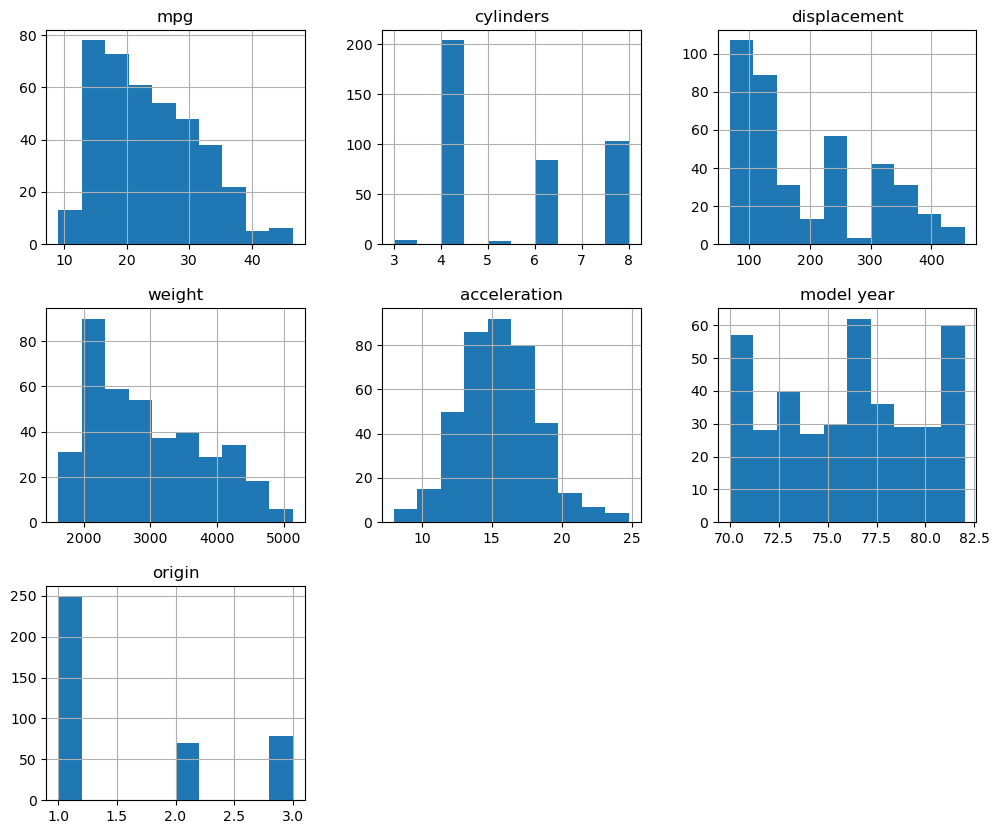

In [14]:
df.hist(figsize=(12,10))
plt.show()

### INSIGHT
* Only acceleration is having a normal distribution.
* cylinders and origin are not having continuous data.
* All others are skewed.

<AxesSubplot:>

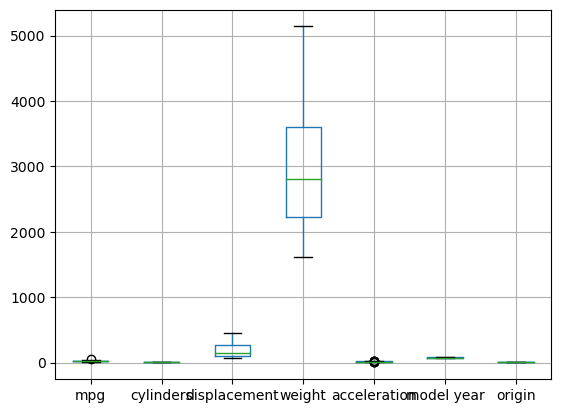

In [15]:
df.boxplot()

C:\Users\hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='mpg'>

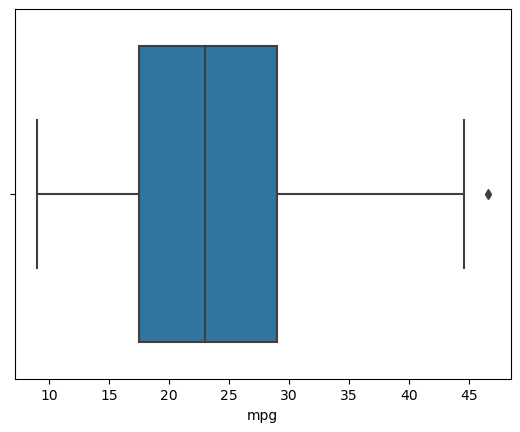

In [16]:
#Boxplot
sns.boxplot(df.mpg)

In [17]:
#Positioning the Outliers
print(np.where(df.mpg>45))

(array([322], dtype=int64),)


In [18]:
print(np.where(df.mpg==45))

(array([], dtype=int64),)


In [19]:
q1=np.percentile(df["mpg"],25)
q3=np.percentile(df["mpg"],75)
IQR=q3-q1
lower_bound=q1-(IQR*1.5)
upper_bound=q3+(IQR*1.5)
for x in ["mpg"]:
    df.loc[df[x]>upper_bound,x]=np.nan

C:\Users\hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='mpg'>

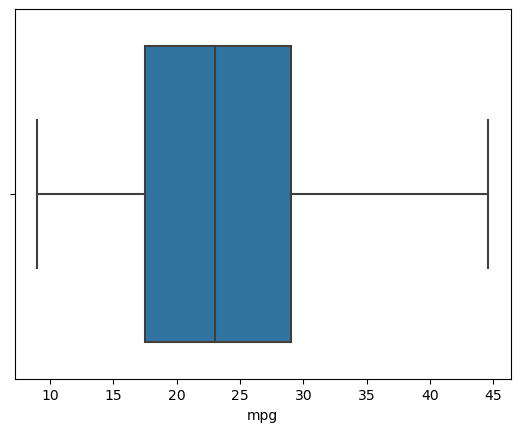

In [20]:
sns.boxplot(df.mpg)

C:\Users\hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='cylinders'>

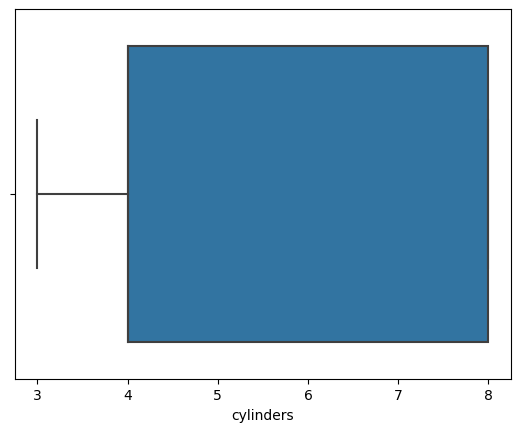

In [21]:
sns.boxplot(df.cylinders)

C:\Users\hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='displacement'>

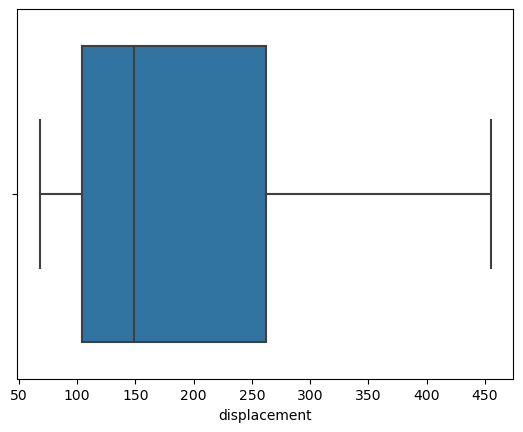

In [22]:
sns.boxplot(df.displacement)

C:\Users\hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='weight'>

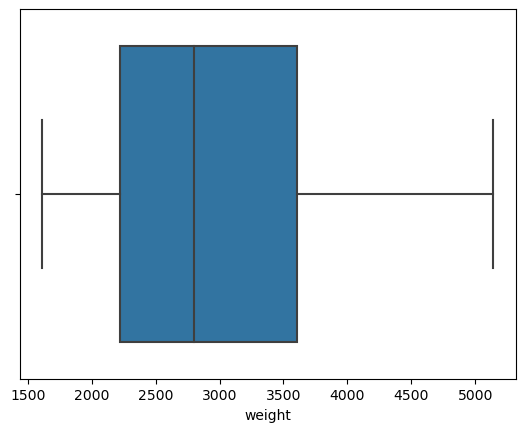

In [23]:
sns.boxplot(df.weight)

C:\Users\hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='acceleration'>

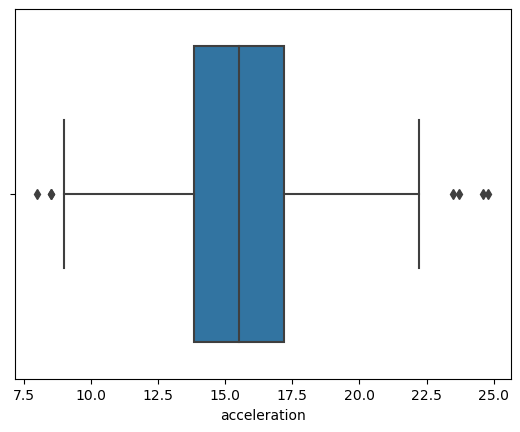

In [24]:
sns.boxplot(df.acceleration)

In [25]:
print(np.where(df.acceleration>22.5))

(array([ 59, 299, 326, 394], dtype=int64),)


In [26]:
print(np.where(df.acceleration<10))

(array([  6,   7,   9,  11,  12, 116], dtype=int64),)


In [27]:
q1=np.percentile(df["acceleration"],25)
q3=np.percentile(df["acceleration"],75)
IQR=q3-q1
lower_bound=q1-(IQR*1.5)
upper_bound=q3+(IQR*1.5)
df['acceleration']=df['acceleration'].apply(lambda x:lower_bound if x<lower_bound else x)
df['acceleration']=df['acceleration'].apply(lambda x:upper_bound if x>upper_bound else x)

C:\Users\hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='acceleration'>

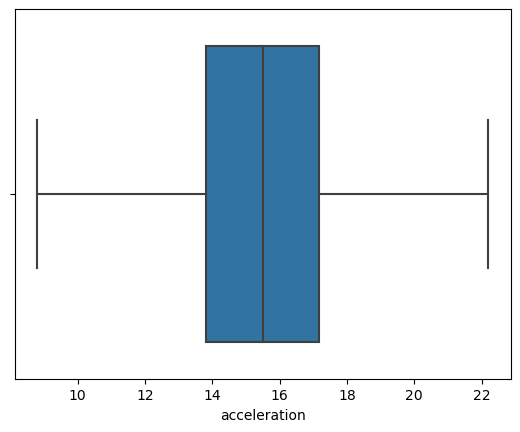

In [28]:
sns.boxplot(df.acceleration)

C:\Users\hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='origin'>

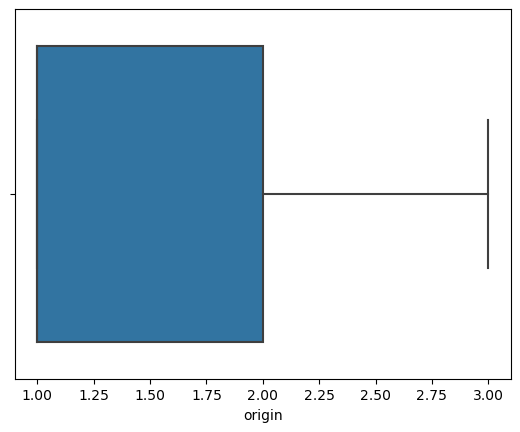

In [29]:
sns.boxplot(df.origin)

In [30]:
df.isnull().sum()

mpg             1
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
model year      0
origin          0
car name        0
dtype: int64

In [31]:
df=df.fillna(df.median())


C:\Users\hp\AppData\Local\Temp\ipykernel_16840\2113983366.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df=df.fillna(df.median())


In [32]:
df.isnull().sum()

mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
model year      0
origin          0
car name        0
dtype: int64

<AxesSubplot:>

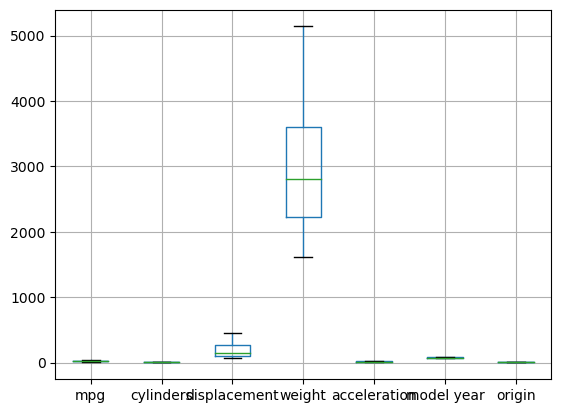

In [33]:
df.boxplot()

# VISUALIZATION

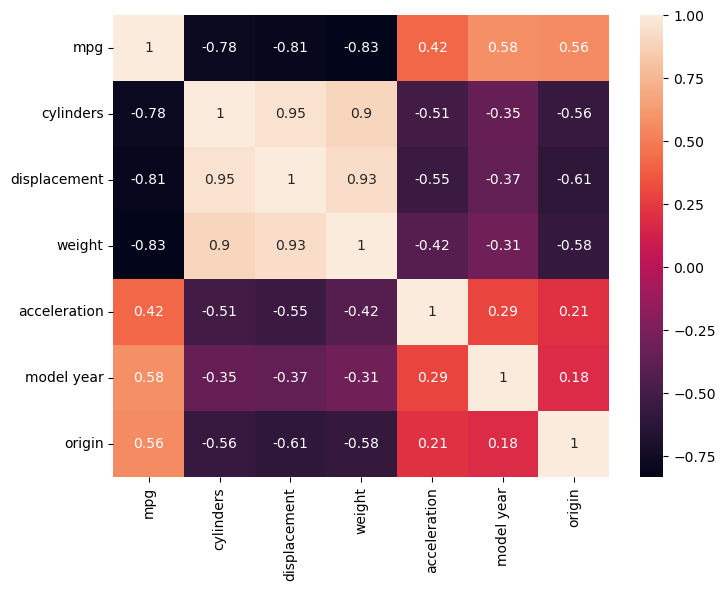

In [34]:
plt.figure(figsize=(8,6))
sns.heatmap(df.corr(),annot=True)
plt.show()

### INSIGHTS FROM HEATMAP
* mpg and cylinders are negatively correlated.When the no.of cylinders increase mpg will decrease.
* Both displacement and weight also negetaively correlated with mpg.
* acceleration is positively correlated with mpg.
* model year is also positively correalated with mpg

<Figure size 2500x1000 with 0 Axes>

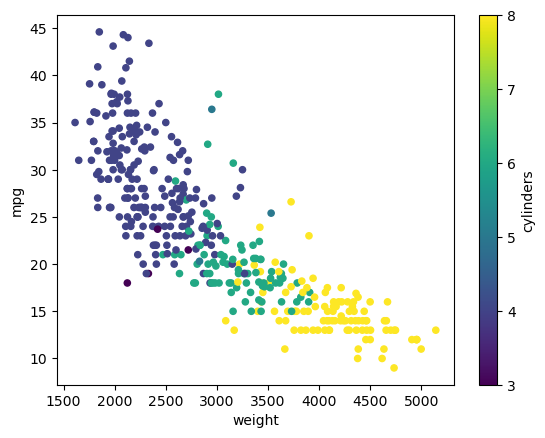

In [35]:
plt.figure(figsize=(25,10))
df.plot.scatter(x='weight',y='mpg',c='cylinders',cmap='viridis')
plt.show()

### INSIGHT
* When the no.of cylinders is more ie,7 or 8, the weight will be more,then mpg is less.
* The no.of cylinders should be reduced to 3 or 4 to reduce the weight and hence the mpg will be more.
* Cylinder is negatively correlated with all the features that increase the mpg,so there is no problem in reducing the no.of cylinders.

<Figure size 2500x1000 with 0 Axes>

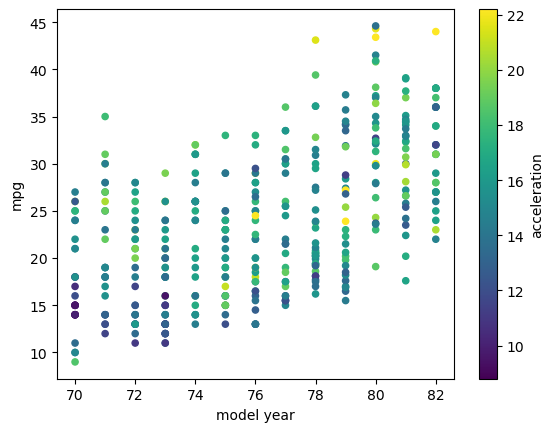

In [36]:
plt.figure(figsize=(25,10))
df.plot.scatter(x='model year',y='mpg',c='acceleration',cmap='viridis')
plt.show()

In [37]:
#to find the index of the data point "22"
df[df['acceleration']>22].index.tolist()

[59, 195, 196, 299, 300, 326, 394]

In [38]:
print(df['car name'].iloc[59])
print(df['car name'].iloc[195])
print(df['car name'].iloc[196])
print(df['car name'].iloc[299])
print(df['car name'].iloc[300])
print(df['car name'].iloc[326])
print(df['car name'].iloc[394])

volkswagen type 3
chevrolet chevette
chevrolet woody
peugeot 504
oldsmobile cutlass salon brougham
vw dasher (diesel)
vw pickup


### INSIGHT
* 1.volkswagen type 3
* 2.chevrolet chevette
* 3.chevrolet woody
* 4.peugeot 504
* 5.oldsmobile cutlass salon brougham
* 6.vw dasher (diesel)
* 7.vw pickup   
 are having high acceleration and hence mpg is also high.

<Figure size 2500x1000 with 0 Axes>

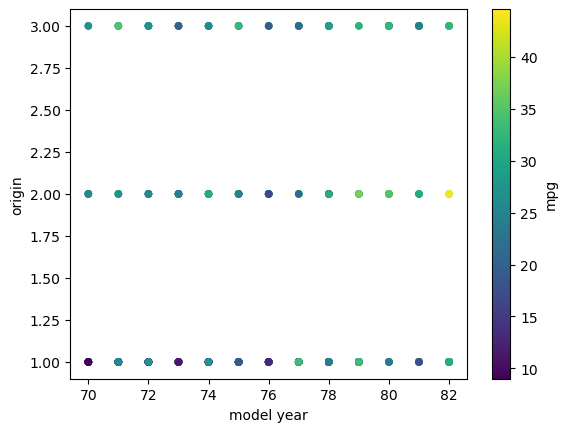

In [39]:
plt.figure(figsize=(25,10))
df.plot.scatter(y='origin',c='mpg',x='model year',cmap='viridis')
plt.show()

In [40]:
df[df['mpg']>44].index.tolist()

[325, 329]

In [41]:
df['mpg'].iloc[325]

44.3

In [42]:
df['mpg'].iloc[329]

44.6

In [43]:
df['car name'].iloc[329]

'honda civic 1500 gl'

### INSIGHT
* honda civic 1500 gl with origin 2 in the year 82 is having the highest mpg.

<Figure size 3000x2500 with 0 Axes>

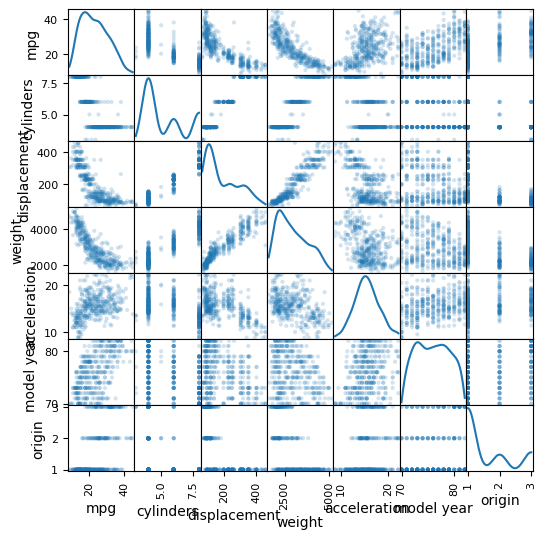

In [44]:
from pandas.plotting import scatter_matrix
plt.figure(figsize=(30,25))
scatter_matrix(df, alpha=0.2, figsize=(6, 6), diagonal="kde")
plt.show()

<AxesSubplot:ylabel='model year'>

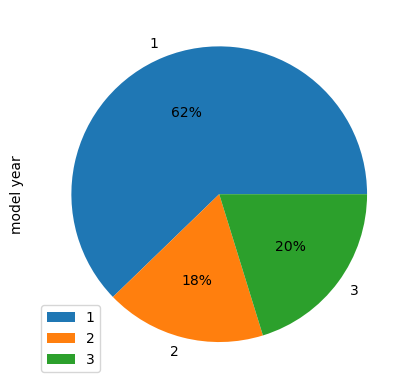

In [64]:
df.groupby(['origin']).sum().plot(kind='pie',y='model year',autopct='%1.0f%%')

<AxesSubplot:ylabel='cylinders'>

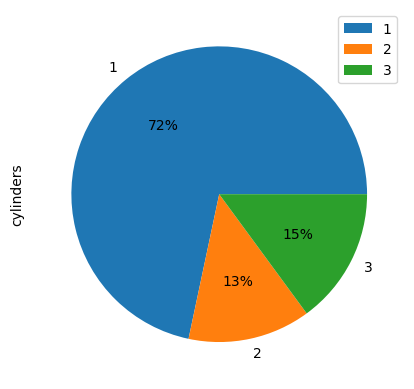

In [63]:
df.groupby(['origin']).sum().plot(kind='pie',y='cylinders',autopct='%1.0f%%')

In [74]:
import plotly.express as px

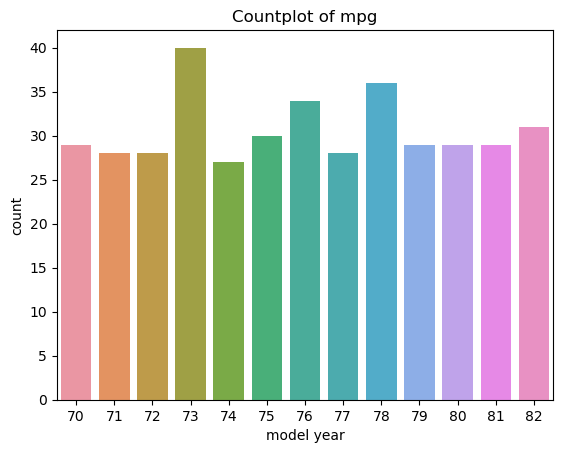

In [76]:
plt.title('Countplot of mpg')
sns.countplot(x=df['model year'])
plt.show()

### INSIGHTS
* model year 73 has produced more no.of cars.